# **PART 1: PRE-PROCESSING**

In [ ]:
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Load the dataset (replace with your actual path)
file_path = "/content/twitter_sentimentanalysis.csv"  # Update path
df = pd.read_csv(file_path)

# Check for missing values and remove duplicates
print(df.isnull().sum())
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Preprocess the tweets (remove URLs, mentions, hashtags, and punctuation)
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions (e.g. @username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (e.g. #hashtag)
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'tweet_content' column
df['cleaned_tweet'] = df['tweet_content'].apply(preprocess_text)

# Display the cleaned data
print(df[['tweet_content', 'cleaned_tweet']].head())



tweet_id           0
tweet_content      0
sentiment_label    0
dtype: int64
                                       tweet_content  \
0       So excited for the weekend trip! Can't wait!   
1  I hate waiting for customer service. It's so f...   
2  Just got a promotion at work! Feeling on top o...   
3           Absolutely devastated by the news today.   
4  Just got a promotion at work! Feeling on top o...   

                               cleaned_tweet  
0               excited weekend trip nt wait  
1  hate waiting customer service frustrating  
2           got promotion work feeling world  
3           absolutely devastated news today  
4           got promotion work feeling world  


# **PART 2: EDA**

<ipython-input-24-cafbb4378460>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')


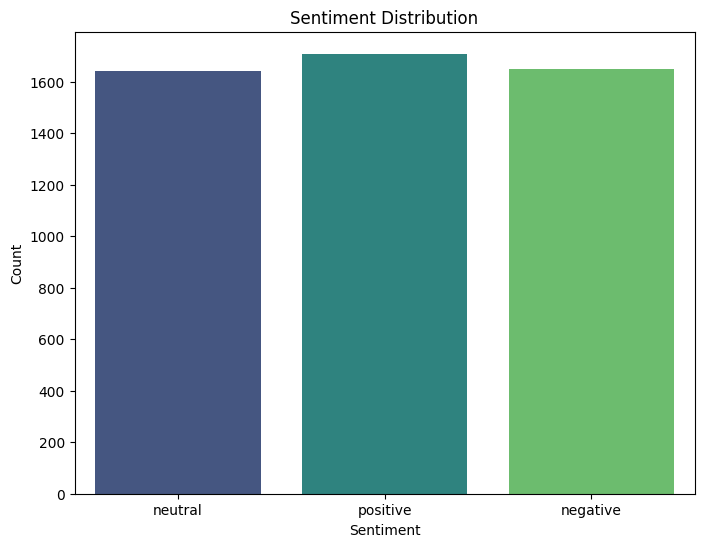

<ipython-input-24-cafbb4378460>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='Blues_d')


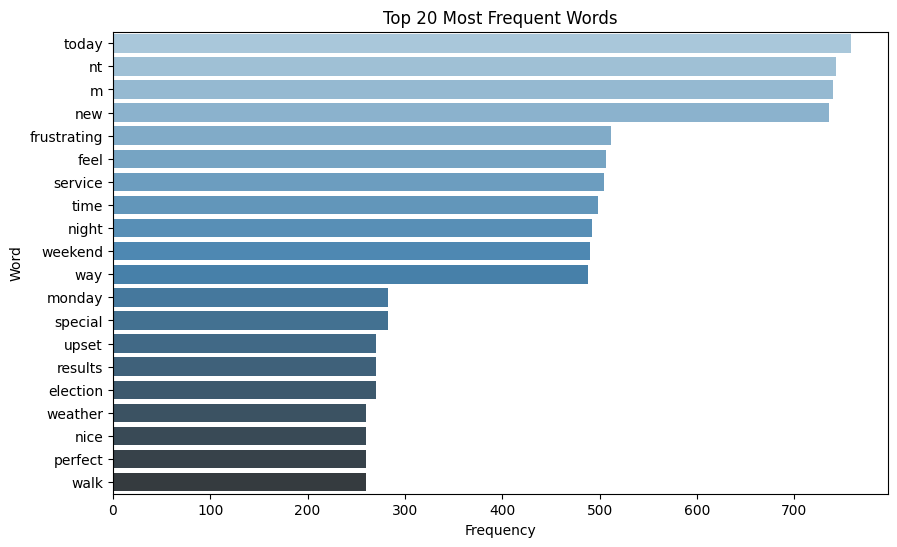

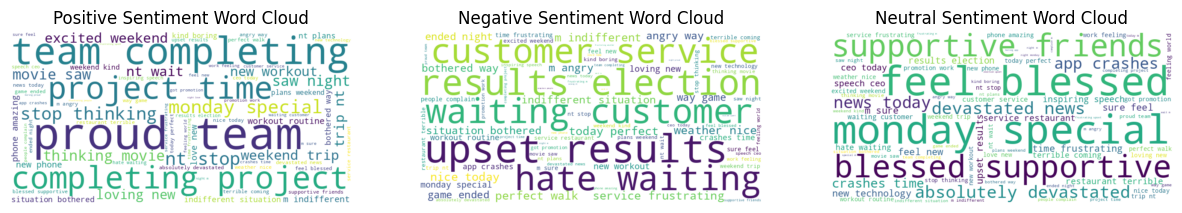

<ipython-input-24-cafbb4378460>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label', y='tweet_length', data=df, palette='Set2')


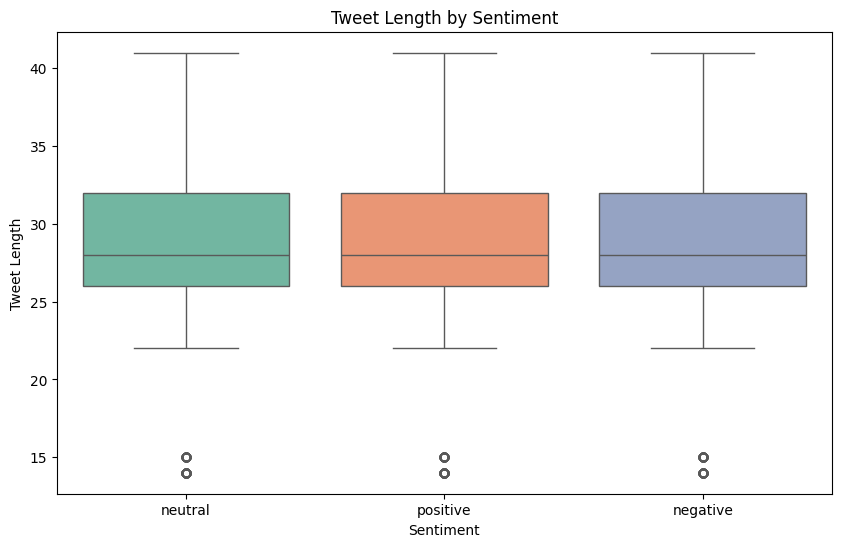

In [ ]:
# --- EDA Part ---
# 1. Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. Word Frequency Analysis
# Tokenize all cleaned tweets
all_words = ' '.join(df['cleaned_tweet']).split()
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# Convert to a DataFrame for easier plotting
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='Blues_d')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# 3. Sentiment vs. Word Frequency (Word Cloud by Sentiment)

# Separate tweets by sentiment label
positive_tweets = df[df['sentiment_label'] == 'positive']
negative_tweets = df[df['sentiment_label'] == 'negative']
neutral_tweets = df[df['sentiment_label'] == 'neutral']

# Combine all positive tweets into one string for word cloud
positive_text = ' '.join(positive_tweets['cleaned_tweet'])
negative_text = ' '.join(negative_tweets['cleaned_tweet'])
neutral_text = ' '.join(neutral_tweets['cleaned_tweet'])

# Create word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot the word clouds
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.show()

# 4. Sentiment vs Tweet Length
df['tweet_length'] = df['cleaned_tweet'].apply(len)

# Plot the sentiment vs tweet length distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_label', y='tweet_length', data=df, palette='Set2')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()


# **PART 3: MACHINE LEARNING MODELS**

Evaluation for Logistic Regression:
Accuracy: 0.3390
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.33      0.32       318
           1       0.36      0.24      0.29       340
           2       0.35      0.44      0.39       342

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.33      1000
weighted avg       0.34      0.34      0.33      1000

Confusion Matrix:


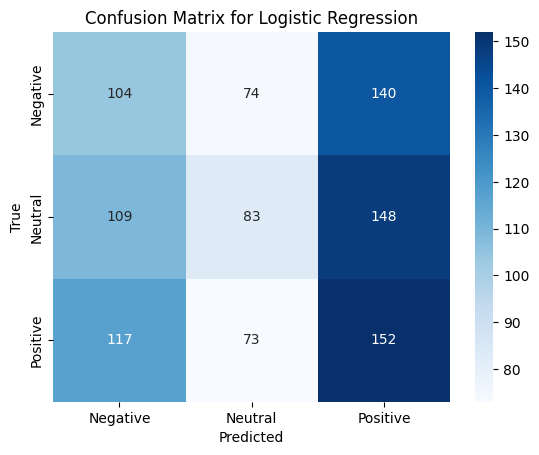

Evaluation for Random Forest:
Accuracy: 0.3410
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.33      0.32       318
           1       0.36      0.30      0.33       340
           2       0.35      0.39      0.37       342

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.34      1000
weighted avg       0.34      0.34      0.34      1000

Confusion Matrix:


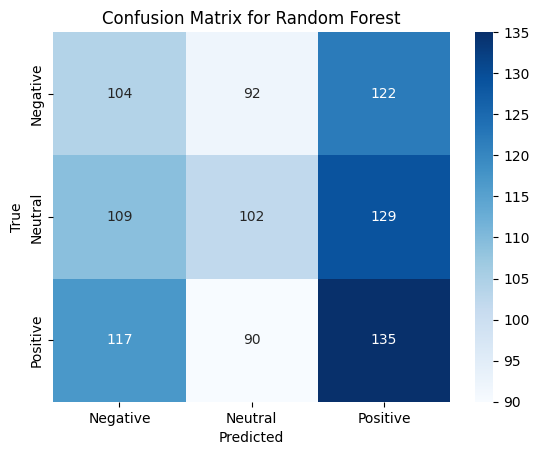

Evaluation for Support Vector Machine:
Accuracy: 0.3390
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.33      0.32       318
           1       0.36      0.24      0.29       340
           2       0.35      0.44      0.39       342

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.33      1000
weighted avg       0.34      0.34      0.33      1000

Confusion Matrix:


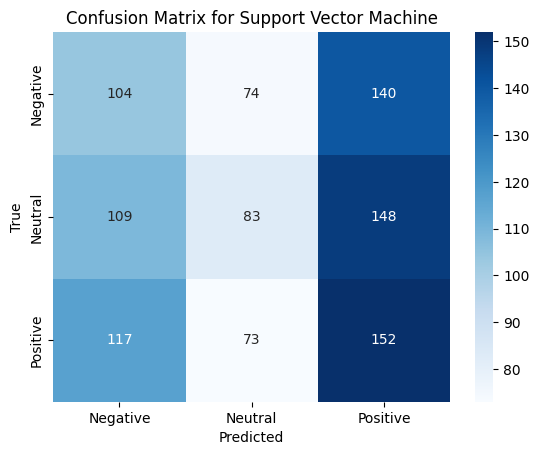

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Convert the sentiment labels to numeric values
df['sentiment_label'] = df['sentiment_label'].map({'positive': 2, 'neutral': 1, 'negative': 0})

# Split data into features and target variable
X = df['cleaned_tweet']
y = df['sentiment_label']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the tweet content using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 1. Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# 2. Random Forest Classifier Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# 3. Support Vector Machine (SVM) Model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)

# Make predictions on the test set
logreg_pred = logreg.predict(X_test_tfidf)
rf_pred = rf.predict(X_test_tfidf)
svm_pred = svm.predict(X_test_tfidf)

# Evaluate the models

def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Evaluate each model
evaluate_model('Logistic Regression', y_test, logreg_pred)
evaluate_model('Random Forest', y_test, rf_pred)
evaluate_model('Support Vector Machine', y_test, svm_pred)


KNN Model Accuracy:  0.322
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.33      0.31       318
           1       0.34      0.19      0.25       340
           2       0.34      0.44      0.38       342

    accuracy                           0.32      1000
   macro avg       0.32      0.32      0.31      1000
weighted avg       0.32      0.32      0.31      1000



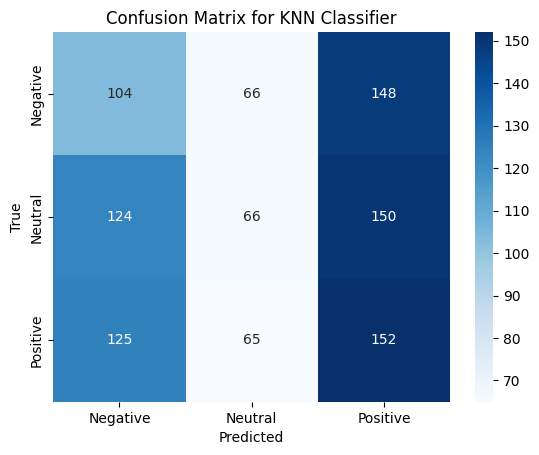

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

# Make predictions on the test data
knn_pred = knn.predict(X_test_tfidf)

# Evaluation
print("KNN Model Accuracy: ", accuracy_score(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Gradient Boosting Accuracy:  0.339
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.33      0.32       318
           1       0.36      0.24      0.29       340
           2       0.35      0.44      0.39       342

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.33      1000
weighted avg       0.34      0.34      0.33      1000



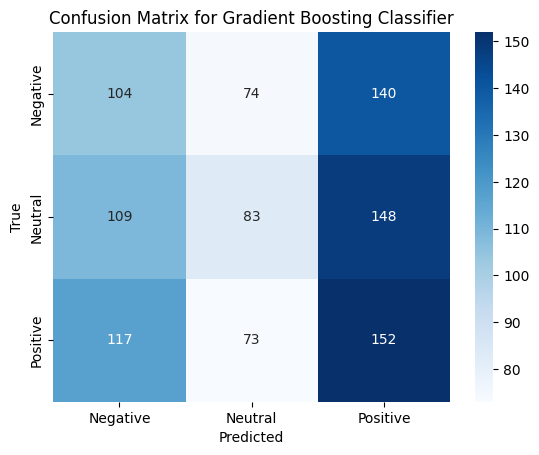

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 2. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train_tfidf, y_train)

# Make predictions on the test data
gb_pred = gb.predict(X_test_tfidf)

# Evaluation
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# Print accuracy for all models
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, logreg_pred):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.4f}")


Logistic Regression Accuracy: 0.3390
Random Forest Accuracy: 0.3410
SVM Accuracy: 0.3390
KNN Accuracy: 0.3220
Gradient Boosting Accuracy: 0.3390
